# Objective

The primary objective of this SQL-based data analysis project is to uncover avenues for enhancing the occupancy rate of underperforming flights. By identifying and addressing these opportunities, the aim is to drive higher profitability for the airline. Through meticulous examination of the data, we intend to pinpoint strategies that can boost the occupancy rate on flights that are currently lagging behind, thereby contributing to the overall financial success of the airline.

1  Increase Occupancy Rate:

   Higher occupancy boosts profit per seat, counteracting challenges.
   Example: Filling more seats on flights to maximize revenue.
   
2  Improve Pricing Strategy:

   Adaptive pricing considering market changes and customer preferences.
   Example: Dynamic pricing based on demand fluctuations.

3  Enhance Customer Experience:

   Seamless, convenient journey to stand out in competitive industry.
   Example: Streamlined booking, comfortable in-flight services.

# Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [4]:
connection = sqlite3.connect('travel.sqlite12')
cursor = connection.cursor()

# extracting table names from the database

In [5]:

cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [6]:
aircrafts_data = pd.read_sql_query("""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [7]:
airports_data= pd.read_sql_query(f"""select * from airports_data""", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [8]:
boarding_passes= pd.read_sql_query(f"""select * from boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [9]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [10]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings """, connection)
bookings.head()
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [11]:
flights = pd.read_sql_query(f"""SELECT * FROM flights  """, connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [12]:
seats = pd.read_sql_query(f"""SELECT * FROM seats  """, connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [13]:
ticket_flights = pd.read_sql_query("""SELECT * FROM ticket_flights  """, connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [14]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets  """, connection)
tickets.head()
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


# column information of each table

In [15]:
for table in table_list:
    print("\ntable: " + table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])



table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

# Data Cleaning

In [16]:
# checking for missing values in each column for every table
for table in table_list:
    print(f'\nMissing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", connection)
    print(df_table.isnull().sum())


Missing Values in table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Missing Values in table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Missing Values in table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Missing Values in table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Missing Values in table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Missing Values in table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Missing Values in table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             

# Basic Analysis 

# How many planes have more than 100 seats?

In [17]:
pd.read_sql_query(f"""select aircraft_code,count(*) as num_count from seats 
group by aircraft_code
having num_count >100
order by aircraft_code desc""" ,connection)

,aircraft_code,num_count
0,773,402
1,763,222
2,733,130
3,321,170
4,320,140
5,319,116


The basic analysis of data provides insights into the number of planes with
more than 100 seats. Above table shows the aircraft with more than 100 seats and the actual
count of the seats


# How the number of tickets booked and total amount earned changed with the time.

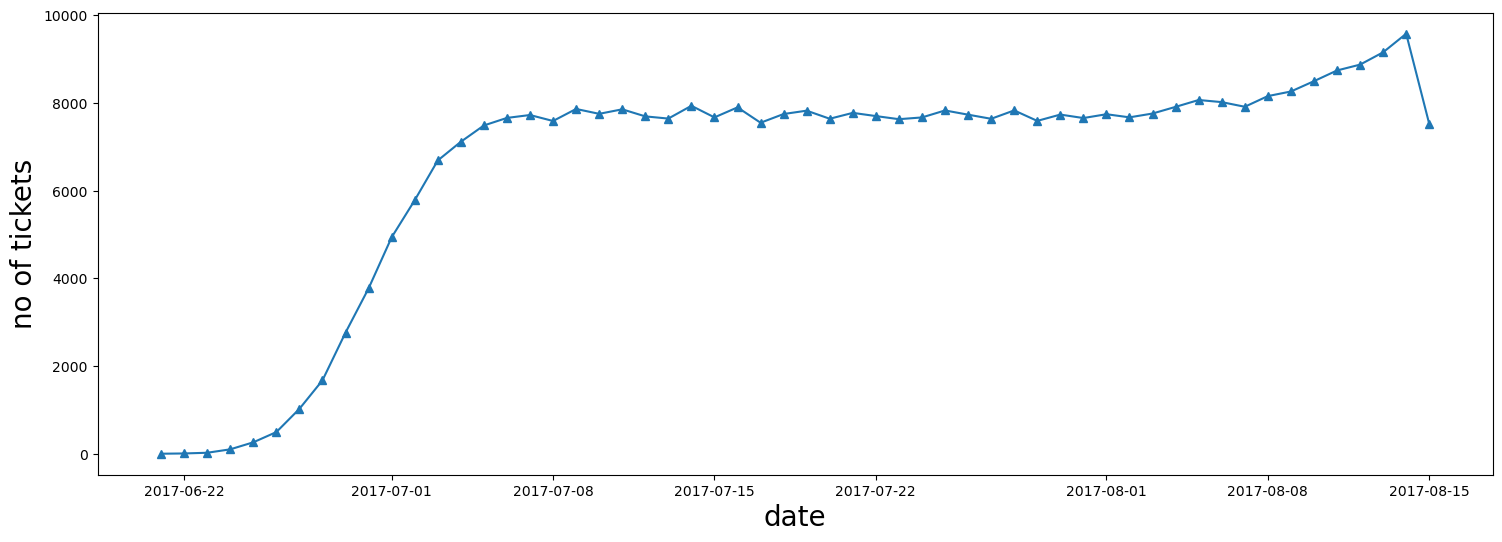

In [18]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref=bookings.book_ref;""",connection)
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_date'].dt.date
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'],marker= '^')  # jo hume count dete hai wahi cheez hum y mein lete hai

plt.xlabel('date',fontsize=20)
plt.ylabel('no of tickets', fontsize=20)
plt.show()


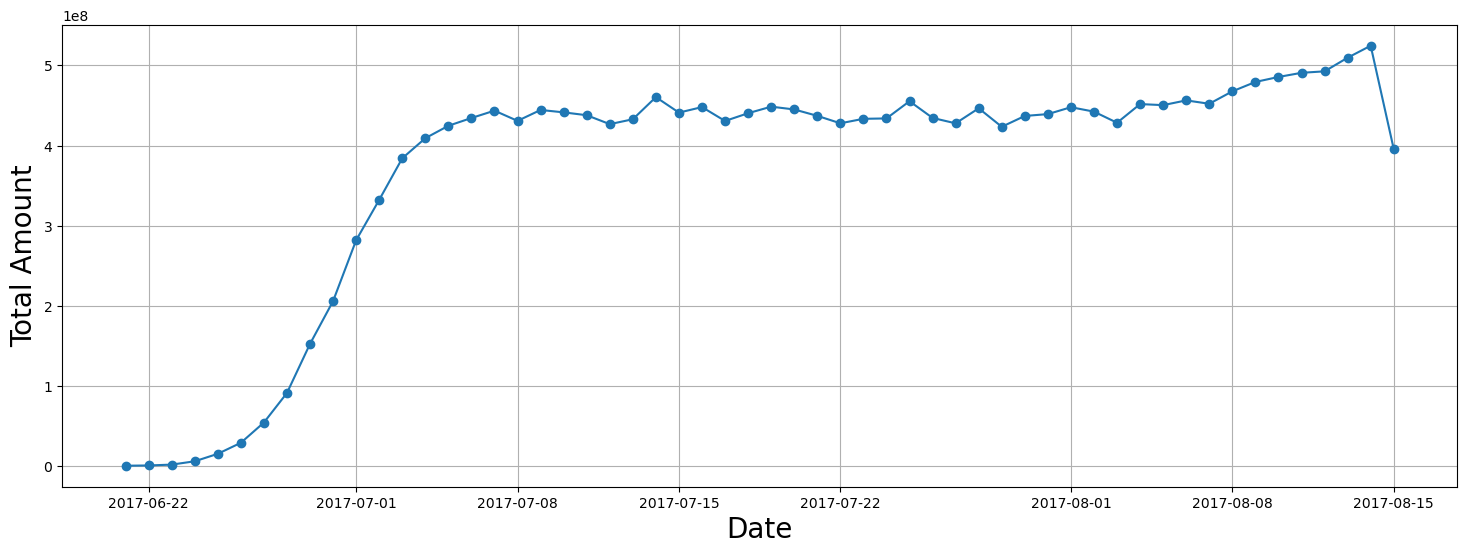

In [19]:
bookings = pd.read_sql_query("""SELECT * FROM bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
y =  bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'], marker = 'o')  #jo hume count dete hai wahi cheez hum y mein lete hai
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Amount', fontsize = 20)
plt.grid('b')
plt.show()


1 Utilized line chart visualization to delve deeper into the trend of ticket bookings and the corresponding revenue earned.

2 Noted a gradual rise in ticket bookings from June 22nd to July 7th, followed by a period of stability from July 8th to August.

3 Observed a distinct peak in ticket bookings on a specific day, indicating the highest number of bookings during the analyzed timeframe.

4 Recognized a close correlation between the number of tickets booked and the revenue generated by the company from these bookings.

5 Identified a parallel trend in total revenue earned by the company throughout the analyzed period.

6 Emphasized the significance of investigating the factors contributing to the peak in ticket bookings to enhance overall revenue and optimize operational strategies.

In [20]:
y.index

Index([2017-06-21, 2017-06-22, 2017-06-23, 2017-06-24, 2017-06-25, 2017-06-26,
       2017-06-27, 2017-06-28, 2017-06-29, 2017-06-30, 2017-07-01, 2017-07-02,
       2017-07-03, 2017-07-04, 2017-07-05, 2017-07-06, 2017-07-07, 2017-07-08,
       2017-07-09, 2017-07-10, 2017-07-11, 2017-07-12, 2017-07-13, 2017-07-14,
       2017-07-15, 2017-07-16, 2017-07-17, 2017-07-18, 2017-07-19, 2017-07-20,
       2017-07-21, 2017-07-22, 2017-07-23, 2017-07-24, 2017-07-25, 2017-07-26,
       2017-07-27, 2017-07-28, 2017-07-29, 2017-07-30, 2017-07-31, 2017-08-01,
       2017-08-02, 2017-08-03, 2017-08-04, 2017-08-05, 2017-08-06, 2017-08-07,
       2017-08-08, 2017-08-09, 2017-08-10, 2017-08-11, 2017-08-12, 2017-08-13,
       2017-08-14, 2017-08-15],
      dtype='object', name='date')

In [21]:
y['total_amount']

date
2017-06-21       441900
2017-06-22       775300
2017-06-23      1822000
2017-06-24      5977000
2017-06-25     15305400
2017-06-26     29049100
2017-06-27     54339900
2017-06-28     91256400
2017-06-29    152484000
2017-06-30    205910000
2017-07-01    281864700
2017-07-02    332231100
2017-07-03    384108400
2017-07-04    409175900
2017-07-05    424680000
2017-07-06    434393100
2017-07-07    443575300
2017-07-08    430814500
2017-07-09    444432000
2017-07-10    441434900
2017-07-11    437876000
2017-07-12    426721800
2017-07-13    432826700
2017-07-14    460449000
2017-07-15    441120100
2017-07-16    448014600
2017-07-17    430686400
2017-07-18    440378400
2017-07-19    448547900
2017-07-20    445062300
2017-07-21    437084500
2017-07-22    427789700
2017-07-23    433387400
2017-07-24    433862000
2017-07-25    455336100
2017-07-26    434484900
2017-07-27    427743700
2017-07-28    446519200
2017-07-29    423439400
2017-07-30    436956700
2017-07-31    439255100
2017-08-01 

# Calculate the average charges for each aircraft with different fare conditions.

In [22]:
df = pd.read_sql_query(f"""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", connection) # pahle aircraft code ke hisab se group kar dega phir fare conditions ke hisab se tod dega 

In [23]:
df

,fare_conditions,aircraft_code,avg_amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

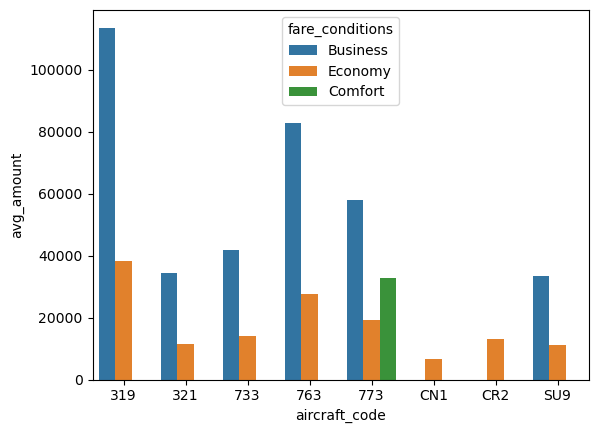

In [24]:
sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions')


1  Employed the generation of a bar graph to visually juxtapose data, following computations of average costs attributed to distinct fare conditions for individual aircraft.

2  Presented in ABOVE FIGURE , the graph illustrated information pertaining to three fare types: business, economy, and comfort. Notably, the comfort class was solely accessible on the 773 aircraft, while the CN1 and CR2 planes exclusively featured the economy class.

3  Observed a consistent pattern across all planes, regardless of fare conditions, where the charges associated with business class consistently exceeded those of the economy class.

4  The bar graph visually highlighted the variations in pricing circumstances within each aircraft, emphasizing the prevalence of higher costs in the business class across the spectrum of planes.

# Analyzing occupancy rate

# For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [25]:
pd.read_sql_query("""with c as (select aircraft_code,count(*) as ticket_count,sum(amount)as total_revenue from ticket_flights
join flights on ticket_flights.flight_id=flights.flight_id
group by aircraft_code)
select aircraft_code,total_revenue,ticket_count,(total_revenue/ticket_count) as avg_revenue_per_ticket from c """,connection)


,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


- Airlines must conduct a comprehensive analysis of their revenue streams to effectively optimize profitability.

- Key metrics such as overall yearly income and average revenue per ticket per aircraft hold significant importance in this analysis.

- Utilizing this data, airlines can discern which aircraft types and routes contribute most significantly to their income, allowing for strategic operational adjustments.

- This research provides insights into potential avenues for optimizing pricing strategies and appropriately allocating resources to routes that offer higher profitability.

- The illustrated ABOVE Figure  presents an overview of total revenue, total tickets sold, and the average revenue generated per ticket for each aircraft.

- Notably, the SU9 aircraft stands out with the highest total revenue. A corresponding observation from Figure 3 indicates that this aircraft offers comparatively lower prices for both business and economy classes, likely driving higher ticket sales due to its cost-effectiveness.

- In contrast, the CN1 aircraft records the lowest total revenue. This can be attributed to its exclusive provision of economy class, potentially indicating less demand due to reduced amenities or service quality.

- Overall, this analysis underscores the significance of strategic pricing, route selection, and service quality in influencing revenue generation and, subsequently, overall profitability.

In [26]:
pd.read_sql_query("""  SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                """,connection)
                                

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [27]:
pd.read_sql_query("""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code """,connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [38]:
pd.read_sql_query("""
    WITH c AS (
        SELECT a.aircraft_code, a.flight_id, a.seats_count, b.num_seats
        FROM (
            SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
            FROM boarding_passes
            INNER JOIN flights ON boarding_passes.flight_id = flights.flight_id
            GROUP BY aircraft_code, flights.flight_id
        ) AS a
        INNER JOIN (
            SELECT aircraft_code, COUNT(*) as num_seats 
            FROM seats 
            GROUP BY aircraft_code
        ) AS b ON a.aircraft_code = b.aircraft_code 
    )
    SELECT * FROM c
""", connection)
 # with c as paranathes ke andar kuch select hona chahaiye 


,aircraft_code,flight_id,seats_count,num_seats
0,319,1162,51,116
1,319,1166,54,116
2,319,1167,57,116
3,319,1168,60,116
4,319,1170,58,116
...,...,...,...,...
11513,SU9,32925,12,97
11514,SU9,32928,25,97
11515,SU9,32931,12,97
11516,SU9,32933,16,97


# Calculate the average occupancy per aircraft.

In [39]:
occupancy_rate = pd.read_sql_query("""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
(AVG(a.seats_count)/b.num_seats) as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code  
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code""", connection)
occupancy_rate  #   you can select this from above table (AVG(a.seats_count)/b.num_seats) because avg is mathmatical operation
#but you cannot select a column which is not present in above table 

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


- The average occupancy per aircraft serves as a critical metric for airlines, offering insights into seat utilization and potential avenues for enhancing occupancy rates.

- This metric enables airlines to gauge the effectiveness of their seat filling strategies and identify opportunities for optimizing occupancy rates.

- Higher occupancy rates carry the potential to significantly amplify revenue and overall profitability, concurrently reducing operational costs related to unoccupied seats.

- Factors such as pricing strategy, flight schedules, and customer satisfaction play pivotal roles in influencing occupancy rates.

- The subsequent ABOVE  Figure  visually represents the average number of booked seats in relation to the total number of seats for each aircraft.

- The calculation of the occupancy rate involves dividing the number of booked seats by the total seat count. A higher occupancy rate signifies a higher proportion of booked seats, indicating efficient seat utilization and fewer unoccupied seats.

- Effectively managing and increasing occupancy rates can be a strategic lever for airlines to optimize revenue generation and profitability, while maintaining a balance between customer satisfaction and operational efficiency.

In [42]:
occupancy_rate['inc occupancy_rate']=occupancy_rate['occupancy_rate']+(occupancy_rate['occupancy_rate']*0.1)

In [43]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


# Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.


In [46]:
total_revenue=pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from flights join ticket_flights
on ticket_flights.flight_id=flights.flight_id
group by aircraft_code""",connection)

In [48]:
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [49]:
occupancy_rate['inc total annual turnover']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy_rate']

In [53]:
occupancy_rate['total annual turnover']=total_revenue['total_revenue']

In [54]:
pd.set_option('display.float_format', str)

In [55]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy_rate,inc total annual turnover,total annual turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0,2706163100
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0,1638164100
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002,1426552100
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0,4371277100
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0,3431205500
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001,96373800
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0,1982760500
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999,5114484700


- Airlines possess the capability to evaluate the potential enhancement in their total annual revenue by introducing a 10% increment in the occupancy rate across all aircraft.

- This assessment aids airlines in comprehending the financial implications of elevating occupancy rates and serves as a tool to determine the feasibility and viability of such a strategy.

- The research offers valuable insights into the projected financial benefits of bolstering occupancy rates and serves as a pivotal element in strategic decision-making.

- Airlines stand to amplify their occupancy rates, resulting in heightened revenue generation, while concurrently delivering elevated value and service to their clientele.

- The optimization of pricing strategies, coupled with meticulous attention to other operational facets, forms a comprehensive approach to augmenting occupancy rates and overall revenue.

- The subsequent figure graphically depicts the augmentation in total revenue subsequent to the implementation of a 10% rise in occupancy rates. The illustration illustrates a gradual increase in revenue, underscoring the significance of a focused approach to pricing strategies for maximizing revenue growth.

- By incorporating data-driven insights and strategic pricing considerations, airlines can pave the path toward sustainable revenue optimization and attain a competitive advantage in the industry.

# Conclusion

Effective analysis of revenue data, encompassing total yearly revenue, average revenue per ticket, and 
average occupancy per aircraft, 
holds paramount importance for airlines aiming to optimize profitability.

The analysis of these key indicators empowers airlines to identify areas for refinement, 
enabling them to make informed adjustments to pricing strategies and route plans.

Elevating the occupancy rate emerges as a pivotal factor in enhancing profitability, as 
it allows airlines to maximize revenue while minimizing the costs associated with unoccupied seats.

The pricing strategy for each aircraft deserves careful consideration, as excessively 
low or high prices can deter ticket purchases. 
Setting a reasonable price aligned with aircraft condition and amenities is crucial.

While striving to boost occupancy rates, airlines must maintain a balance between 
profitability and ensuring customer satisfaction and safety. Upholding high-quality service and safety regulations is paramount, 
even amid efforts to increase profits.

The adoption of a data-driven approach to revenue analysis and 
optimization equips airlines to achieve enduring success in a competitive industry. 
This strategic use of data can drive long-term growth and profitability.